In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Lectura del archivo excel:

    1. Datos: datos con el PBI (a precios constantes y corrientes), valor de tipo de cambio del dólar, y población por año.
    2. Reservas Internacionales: Datos crudos del valor en millones de dólares de las reservas internacionales por día habil entre 2004 y 2020
    3. Formación Bruta de Capital Fijo: Datos con la FBKF a precios corrientes y constantes con base en 2004

In [2]:
estadisticas = pd.ExcelFile('datos.xlsx', engine = 'openpyxl')

In [3]:
datos = pd.read_excel(estadisticas, 'Datos')
reservas = pd.read_excel(estadisticas, 'Reservas Internacionales')
fbkf = pd.read_excel(estadisticas, 'Formación Bruta de Capital Fijo')

### Cálculo del promedio anual de las Reservas Internacionales

In [4]:
reservas["Fecha"] = pd.to_datetime(reservas["Fecha"])

In [5]:
reservas_por_año = reservas.groupby(reservas["Fecha"].dt.year).mean()

#### Limpieza de los datos

In [6]:
datos_t = datos.transpose()
datos_t.rename(columns=datos_t.iloc[0], inplace = True)
datos_t.drop(datos_t.index[0], inplace = True)

In [7]:
datos_t["Reservas Internacionales en millones de dólares"] = reservas_por_año

In [8]:
datos_t

,Producto Interno Bruto en millones de pesos a precios de 2004,Producto Interno Bruto en millones de pesos a precios corrientes,Población,Tipo de cambio,Reservas Internacionales en millones de dólares
2004,485115,485115,3.8492e+07,2.94442,16884.071429
2005,528056,582538,3.88929e+07,2.92332,23419.366142
2006,570549,715904,3.92899e+07,3.07456,25063.305221
2007,621943,896980,3.96843e+07,3.1159,40383.178138
2008,647176,1.14965e+06,4.00802e+07,3.16276,47778.875502
2009,608873,1.24793e+06,4.04828e+07,3.7305,46355.044715
2010,670524,1.66172e+06,4.07885e+07,3.91286,49717.191057
2011,710782,2.17902e+06,4.12615e+07,4.13052,50410.134146
2012,703486,2.63791e+06,4.17333e+07,4.55252,46140.289256
2013,720407,3.34831e+06,4.22029e+07,5.4837,37514.356846


### Cálculo de estadísticas macroeconómicas

1. PBI per cápita a precios constantes en miles de pesos
2. PBI en millones de dólares a precios corrientes
3. PBI per cápita en miles de dólares a precios corrientes
4. Reservas internacionales brutas del Banco Central como porcentaje del PBI

In [9]:
datos_t["PBI per cápita a precios constantes en miles de pesos"] = 1000*datos_t["Producto Interno Bruto en millones de pesos a precios de 2004"]/datos_t["Población"]

In [10]:
datos_t["PBI en millones de dólares a precios corrientes"] = datos_t["Producto Interno Bruto en millones de pesos a precios corrientes"]/datos_t["Tipo de cambio"]

In [11]:
datos_t["PBI per cápita en miles de dólares a precios corrientes"] = 1000* datos_t["PBI en millones de dólares a precios corrientes"]/ datos_t["Población"]

In [12]:
datos_t["Reservas Internacionales como porcentaje del PBI"] = 100* datos_t["Reservas Internacionales en millones de dólares"]/datos_t["PBI en millones de dólares a precios corrientes"]

#### Inclusión de los datos de Formación Bruta de Capital Fijo

In [13]:
fbkf.dropna(inplace = True)
fbkf_t = fbkf.transpose()
fbkf_t.rename(columns=fbkf_t.iloc[0], inplace = True)
fbkf_t.drop(fbkf_t.index[0], inplace = True)

In [14]:
datos_t = pd.concat([fbkf_t, datos_t], axis = 1)

### Cálculo de Tasa de crecimiento del PBI anual en pesos constantes

Para obtener la tasa porcentual de crecimiento del PBI hay que calcular

<p style="text-align: center;">
<font size="5">
$\% \Delta PBI_t = \frac{PBI_t - PBI_{t-1}}{PBI_{t-1}} \cdot 100$
</p>

In [15]:
PBI_corriente = datos_t["Producto Interno Bruto en millones de pesos a precios de 2004"].to_list()

In [16]:
crecimiento_pbi_anual = {}
for i in range(len(PBI_corriente)-1):
    crecimiento_pbi = 100*(PBI_corriente[i+1]-PBI_corriente[i])/PBI_corriente[i]
    crecimiento_pbi_anual[2004+i+1] = crecimiento_pbi

In [17]:
crecimiento_pbi_anual = pd.Series(crecimiento_pbi_anual)

In [18]:
tabla = pd.merge(crecimiento_pbi_anual.rename("Crecimiento PBI %"), datos_t, "outer", right_index = True, left_index= True)

In [19]:
tabla

,Crecimiento PBI %,Formación bruta de capital fijo en millones de pesos a precios corrientes,Formación bruta de capital fijo en millones de pesos a precios de 2004,Producto Interno Bruto en millones de pesos a precios de 2004,Producto Interno Bruto en millones de pesos a precios corrientes,Población,Tipo de cambio,Reservas Internacionales en millones de dólares,PBI per cápita a precios constantes en miles de pesos,PBI en millones de dólares a precios corrientes,PBI per cápita en miles de dólares a precios corrientes,Reservas Internacionales como porcentaje del PBI
2004,NaN,77103.2,77103.2,485115,485115,3.8492e+07,2.94442,16884.071429,12.603,164757,4.28031,10.2478
2005,8.851660,101077,89307.4,528056,582538,3.88929e+07,2.92332,23419.366142,13.5772,199273,5.12363,11.7524
2006,8.047152,131234,102233,570549,715904,3.92899e+07,3.07456,25063.305221,14.5215,232848,5.92641,10.7638
2007,9.007651,175055,123142,621943,896980,3.96843e+07,3.1159,40383.178138,15.6723,287872,7.25406,14.0282
2008,4.057233,218550,133850,647176,1.14965e+06,4.00802e+07,3.16276,47778.875502,16.147,363495,9.0692,13.1443
2009,-5.918525,194449,103636,608873,1.24793e+06,4.04828e+07,3.7305,46355.044715,15.0403,334520,8.26327,13.8572
2010,10.125398,276535,130846,670524,1.66172e+06,4.07885e+07,3.91286,49717.191057,16.4391,424682,10.4118,11.7069
2011,6.003952,375844,153584,710782,2.17902e+06,4.12615e+07,4.13052,50410.134146,17.2263,527542,12.7853,9.55566
2012,-1.026420,418308,142718,703486,2.63791e+06,4.17333e+07,4.55252,46140.289256,16.8567,579441,13.8844,7.9629
2013,2.405324,545423,146057,720407,3.34831e+06,4.22029e+07,5.4837,37514.356846,17.0701,610593,14.468,6.14392


### Cálculo de la tasa de crecimiento promedio acumulado del PBI anual en pesos constantes a lo largo de los períodos
- 2004-2020 
- 2004-2011
- 2011-2020

Para obtener estos valores hay que recordar que el crecimiento se comporta de forma compuesta, es decir que el crecimiento total no es la suma de los crecimientos de cada año sino su producto. Teniendo en cuenta esto la fórmula para obtener el crecimiento anual promedio (**x**) dado un crecimiento total acumulado **CT** en un período de **n** años es: 

<p style="text-align: center;">
<font size="5">
$x = [(1 + CT)^{\frac{1}{n}} - 1] \cdot 100 $
    
</p>

In [20]:
CT_2004_2020 = (PBI_corriente[-1]-PBI_corriente[0])/PBI_corriente[0]
CT_2004_2011 = (PBI_corriente[7]-PBI_corriente[0])/PBI_corriente[0]
CT_2011_2020 = (PBI_corriente[-1]-PBI_corriente[7])/PBI_corriente[7]

In [21]:
def promedio_tasa_crecimiento(CT, n):
    return ((1+ CT)**(1/n)-1) *100

In [22]:
crecimiento_promedio_2004_2020 = promedio_tasa_crecimiento(CT_2004_2020, 16)
crecimiento_promedio_2004_2011 = promedio_tasa_crecimiento(CT_2004_2011, 7)
crecimiento_promedio_2011_2020 = promedio_tasa_crecimiento(CT_2011_2020, 9)

In [23]:
print("La tasa de crecimiento promedio acumuilado del PBI anual en pesos constantes a lo largo de 2004 y 2020 es {} %".format(crecimiento_promedio_2004_2020))
print("La tasa de crecimiento promedio acumuilado del PBI anual en pesos constantes a lo largo de 2004 y 2011  es {} %".format(crecimiento_promedio_2004_2011))
print("La tasa de crecimiento promedio acumuilado del PBI anual en pesos constantes a lo largo de 2011 y 2020 es {} %".format(crecimiento_promedio_2011_2020))

La tasa de crecimiento promedio acumuilado del PBI anual en pesos constantes a lo largo de 2004 y 2020 es 1.5893920534175265 %
La tasa de crecimiento promedio acumuilado del PBI anual en pesos constantes a lo largo de 2004 y 2011  es 5.608471422383188 %
La tasa de crecimiento promedio acumuilado del PBI anual en pesos constantes a lo largo de 2011 y 2020 es -1.4305125382749195 %


## Gráficos

### PBI anual y per cápita en dólares corrientes

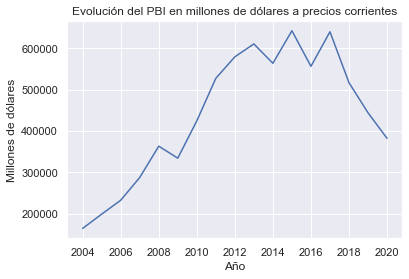

In [24]:
sns.set_theme()
g1 = sns.lineplot(x= tabla.index, y = tabla["PBI en millones de dólares a precios corrientes"].astype(float))
g1.set(title = "Evolución del PBI en millones de dólares a precios corrientes")
g1.set_ylabel("Millones de dólares")
g1.set_xlabel("Año");

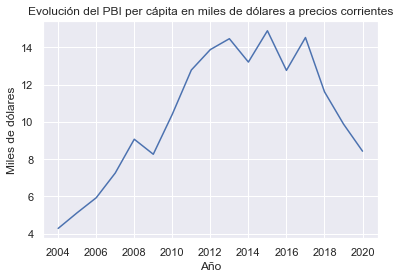

In [25]:
g2 = sns.lineplot(x= tabla.index, y = tabla["PBI per cápita en miles de dólares a precios corrientes"].astype(float))
g2.set(title = "Evolución del PBI per cápita en miles de dólares a precios corrientes")
g2.set_ylabel("Miles de dólares")
g2.set_xlabel("Año");

### PBI anual y per cápita a precios constantes

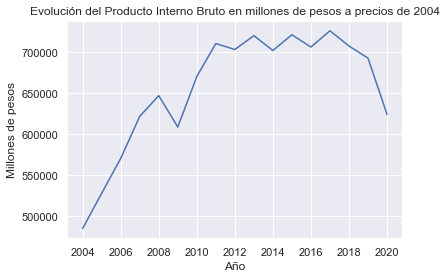

In [26]:
g3 = sns.lineplot(x= tabla.index, y = tabla["Producto Interno Bruto en millones de pesos a precios de 2004"].astype(float))
g3.set(title = "Evolución del Producto Interno Bruto en millones de pesos a precios de 2004")
g3.set_ylabel("Millones de pesos")
g3.set_xlabel("Año");

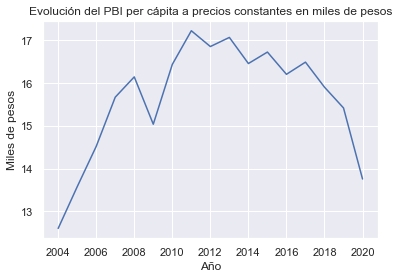

In [27]:
g4 = sns.lineplot(x= tabla.index, y = tabla["PBI per cápita a precios constantes en miles de pesos"].astype(float))
g4.set(title = "Evolución del PBI per cápita a precios constantes en miles de pesos")
g4.set_ylabel("Miles de pesos")
g4.set_xlabel("Año");

### Tasa de inversión (FBKF) a precios constantes y a precios corrientes

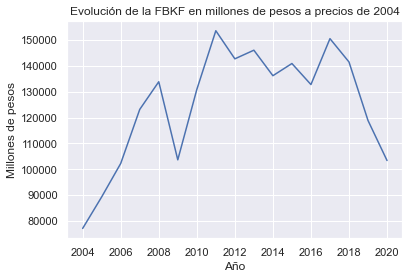

In [28]:
g5 = sns.lineplot(x= tabla.index, y = tabla["Formación bruta de capital fijo en millones de pesos a precios de 2004"].astype(float))
g5.set(title = "Evolución de la FBKF en millones de pesos a precios de 2004")
g5.set_ylabel("Millones de pesos")
g5.set_xlabel("Año");

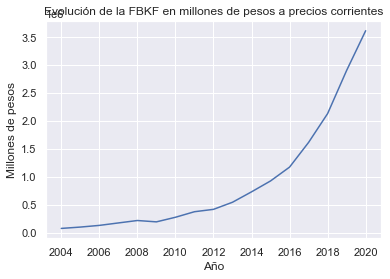

In [29]:
g6 = sns.lineplot(x= tabla.index, y = tabla["Formación bruta de capital fijo en millones de pesos a precios corrientes"].astype(float))
g6.set(title = "Evolución de la FBKF en millones de pesos a precios corrientes")
g6.set_ylabel("Millones de pesos")
g6.set_xlabel("Año");

Para representar la tasa de inversión es más adecuado expresar la Formación Bruta de Capital Fijo a valores constantes. Tomar valores corrientes daría la falsa sensación de que la inversión aumentó, cuando lo hizo solamente su valor nominal. En otras palabras, si bien hoy se gastan más unidades monetarias en capital cada una de esas "unidades de capital" aumentó su valor. La forma de compensar por este aumento es utilizando precios constantes en lugar de los corrientes.

### Reservas Internacionales brutas del Banco Central como porcentaje del PBI

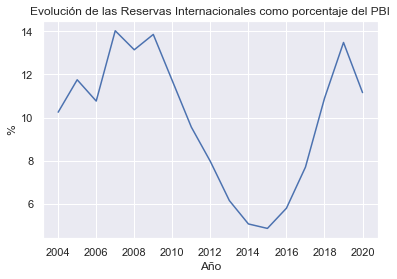

In [30]:
g7 = sns.lineplot(x= tabla.index, y = tabla["Reservas Internacionales como porcentaje del PBI"].astype(float))
g7.set(title = "Evolución de las Reservas Internacionales como porcentaje del PBI")
g7.set_ylabel("%")
g7.set_xlabel("Año");

### Tasa de crecimiento del PBI anual en pesos constantes

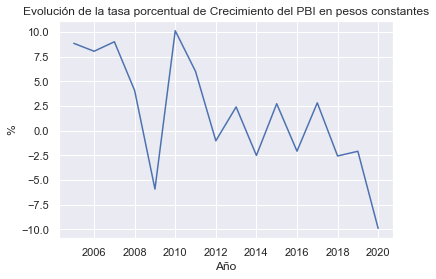

In [31]:
g8 = sns.lineplot(x= tabla.index, y = tabla["Crecimiento PBI %"].astype(float))
g8.set(title = "Evolución de la tasa porcentual de Crecimiento del PBI en pesos constantes")
g8.set_ylabel("%")
g8.set_xlabel("Año");


---------------------------------------------------------------------------------------------------